In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [2]:
# Read the data

# Read the data using a raw string (r'...') to avoid escape sequence issues
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\DataSetNvidiaK\\NVDA.csv')

# Show the data
df 

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000
...,...,...,...,...,...,...,...
6553,2025-02-10,133.570007,133.570007,135.000000,129.960007,130.089996,216989100
6554,2025-02-11,132.800003,132.800003,134.479996,131.020004,132.580002,178902400
6555,2025-02-12,131.139999,131.139999,132.240005,129.080002,130.020004,160278600
6556,2025-02-13,135.289993,135.289993,136.500000,131.169998,131.559998,197430000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6558 non-null   object 
 1   Adj Close  6558 non-null   float64
 2   Close      6558 non-null   float64
 3   High       6558 non-null   float64
 4   Low        6558 non-null   float64
 5   Open       6558 non-null   float64
 6   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 358.8+ KB


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [8]:
# Set Date as index - better time series handling
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 

In [9]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


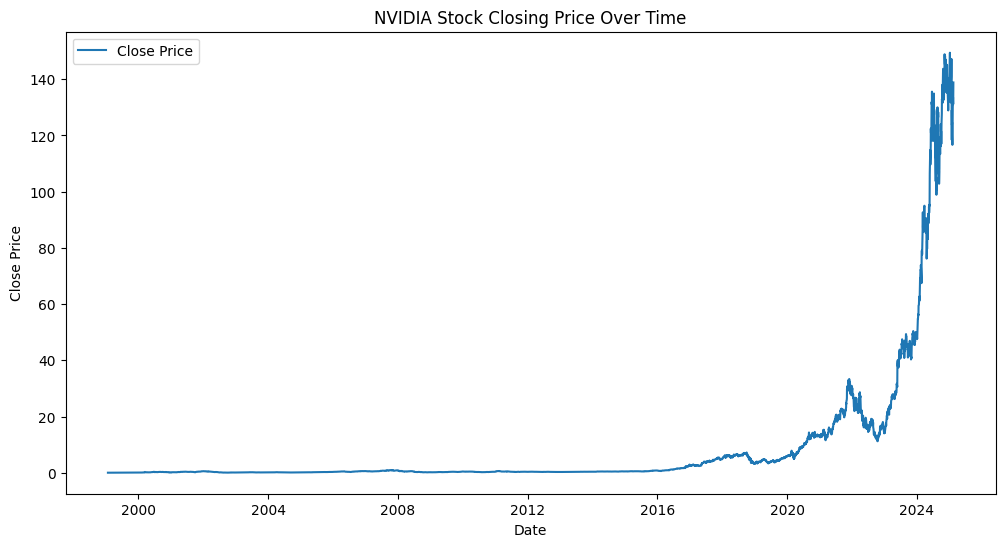

In [10]:
# Time-Series Plot of Closing Price

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

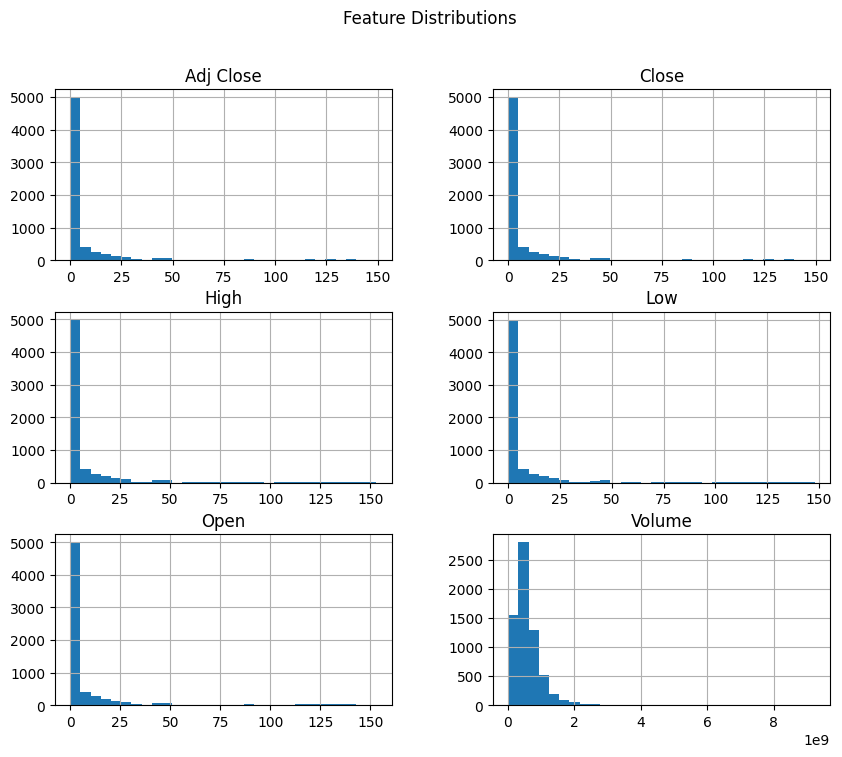

In [11]:
# Histogram for distributions
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

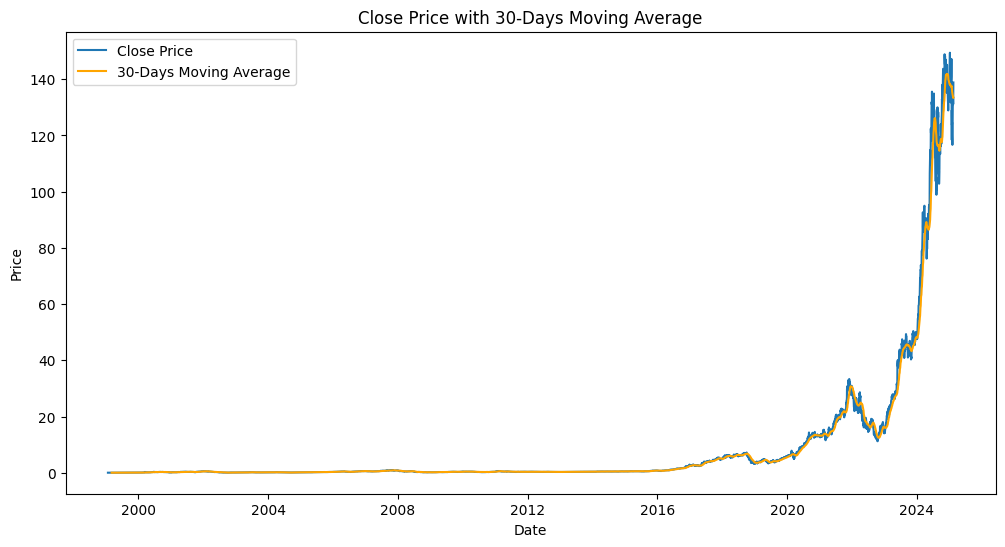

In [13]:
# Trend Analysis (Rolling Mean)

df['Close_30Days_Mean'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Close_30Days_Mean'], label='30-Days Moving Average', color='orange')
plt.title('Close Price with 30-Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

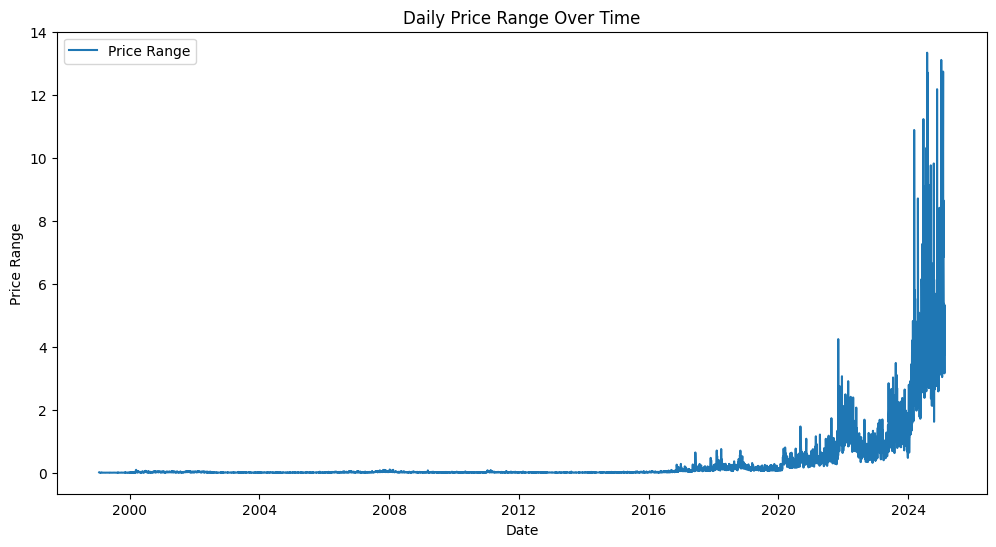

In [14]:
# Insight and Analysis - Price Range Analysis

df['Price Range'] = df['High'] - df['Low']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price Range'], label='Price Range')
plt.title('Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

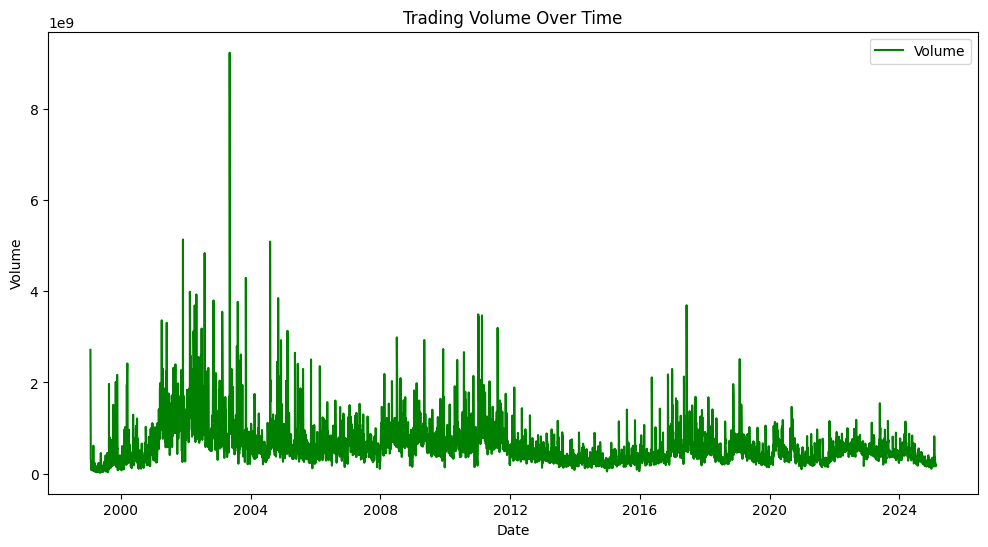

In [15]:
# Volume Analysis

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Volume', color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

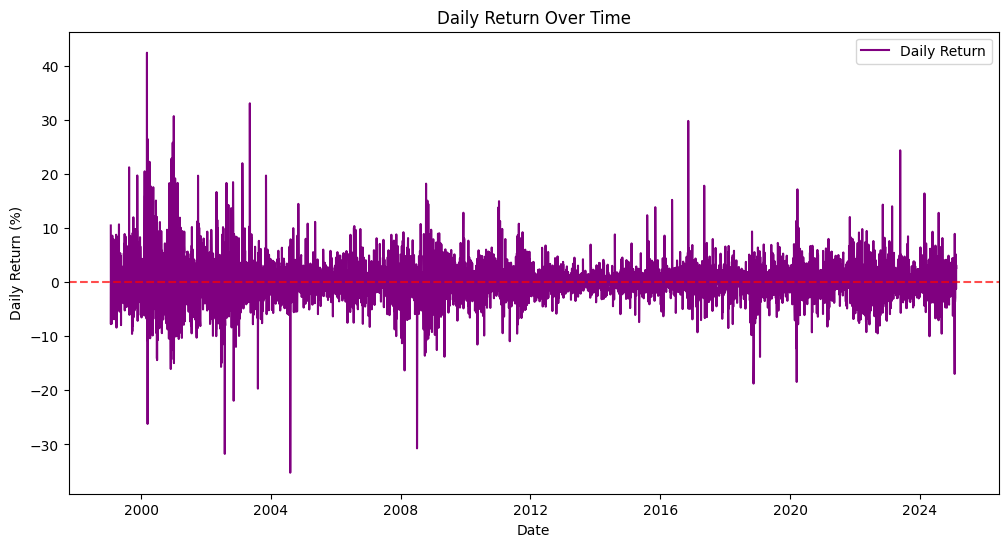

In [16]:
# Advance Analysis
# Volatility Analysis 
df['Daily Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color='purple')
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()


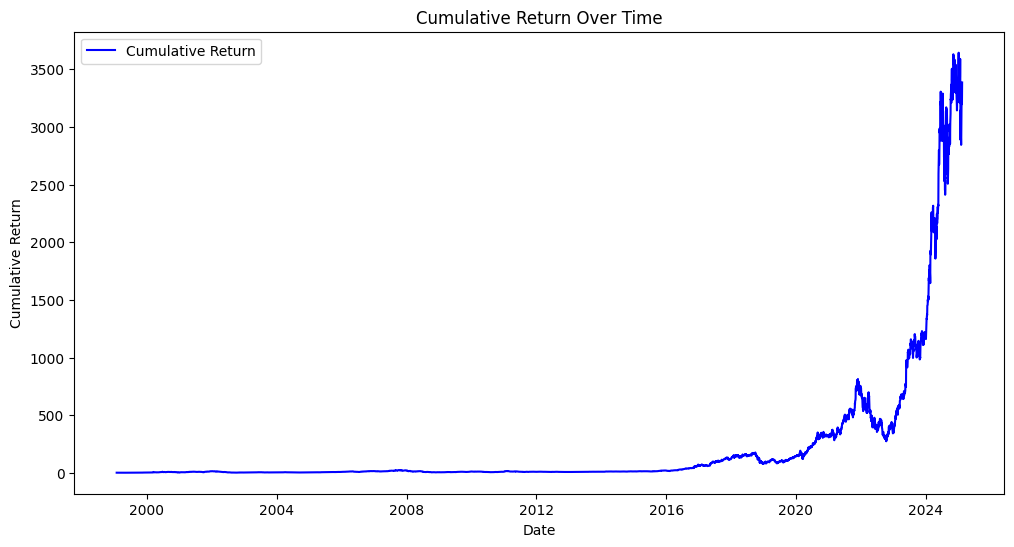

In [17]:
# Cumulative Returns
df['Cumulative Return'] = (1 + df['Daily Return'] / 100).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


# Predictive Model 

In [18]:
# Libraries 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [19]:
# Features - Moving Average, Price Range, Daily Return
df['Price Range'] = df['High'] - df['Low']
df['Daily Return'] = df['Close'].pct_change()
df['7-Day Moving Avg'] = df['Close'].rolling(window=7).mean()
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Drop rows with NaN values (created by rolling windows)
df.dropna(inplace=True)

# Define the features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Price Range', 'Daily Return', '7-Day Moving Avg', '30-Day Moving Avg']]
Y = df['Close']

In [20]:
# Train-Test Split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

In [21]:
# Standarize the Data - Volume - Scaling improves model performance 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the Random Forest Regressor

In [22]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = model.predict(X_test_scaled)

In [23]:
# Evaluate the Model
# Calculate metrics 

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 33.11665082366228
Mean Squared Error: 2719.4142708564164
R2 Score: -0.6708454588302795


### The R2 Score: -0.6707297903861775  mean that RandomForestRegressor is not performing good as a predictive model. 

# XGBooster

In [24]:
#Data Leakage from StandardScaler¶
#Use StandardScaler before splitting the dataset. This introduces future data leakage, which makes the model perform poorly.

#Fix: Apply StandardScaler AFTER train-test split.

# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Split the data first
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

# Apply StandardScaler AFTER the split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler trained on X_train!

In [40]:
#Use a Better Loss Function for XGBoost¶
#By default, XGBoost minimizes mean squared error (MSE), but financial time-series data often benefits from other loss functions.

#Fix: Try huber loss, which is more robust to outliers.

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500, 
    max_depth=10, 
    learning_rate=0.01, 
    objective='reg:pseudohubererror',  # More robust
    random_state=42
)

In [41]:
from xgboost import XGBRegressor, XGBClassifier

# Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Classification
xgb_clf = XGBClassifier(objective='binary:logistic', n_estimators=100)

In [42]:
#Shift Target Variable to Prevent Lookahead Bias¶
#If you're using future stock prices (Close column) as the target, then your model might be unintentionally using future information.

#Fix: Predict tomorrow's closing price instead of today’s.
df['Target'] = df['Close'].shift(-1)  # Predict next day's close
df.dropna(inplace=True)  # Drop last row

# Update target variable
Y = df['Target']

In [43]:
# Review the columns
print(df.columns)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Close_30Days_Mean', 'Price Range', 'Daily Return', 'Cumulative Return',
       '7-Day Moving Avg', '30-Day Moving Avg', 'Target'],
      dtype='object')


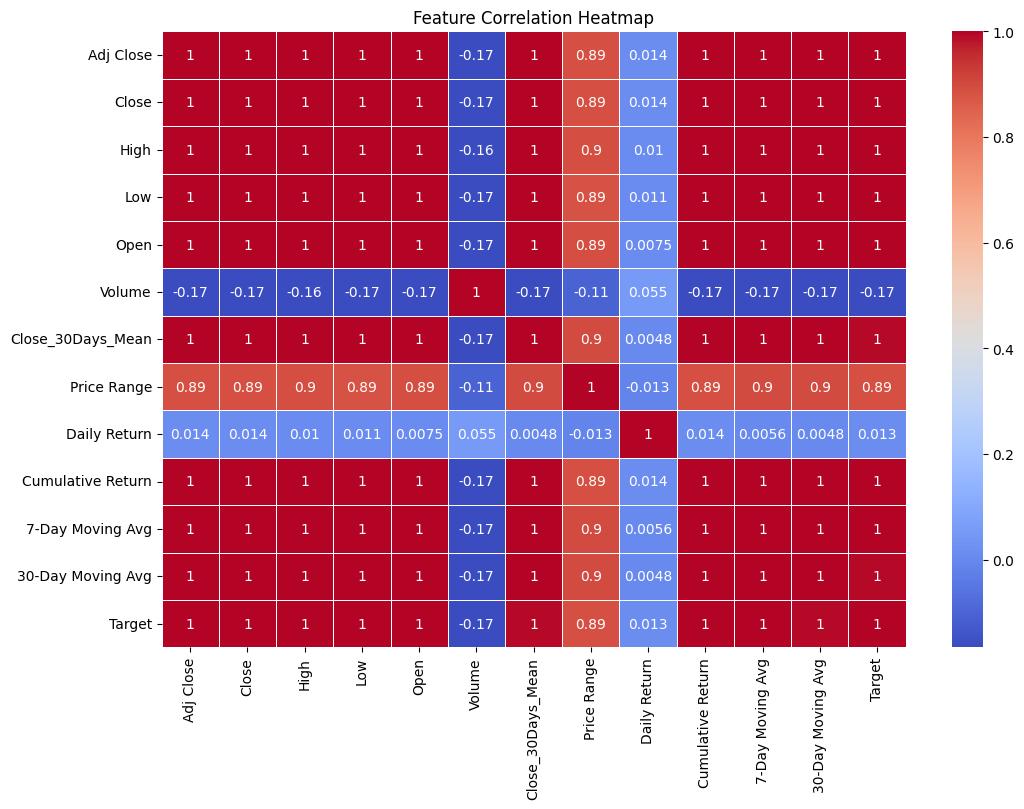

In [44]:
# Data Distribution Review 
#Correlation and Future Importance

import seaborn as sns

#Check feature correlation with target
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
#Removing Some Features¶
#Remove weak or redundant features:
X = df[['Open', 'High', 'Low', 'Volume']]  # Remove weak features

In [33]:
#Simpler Model (Baseline Test)¶
#Try Linear Regression to see if the problem is with the model:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
Y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression R2 Score:", r2_score(Y_test, Y_pred_lr))

Linear Regression R2 Score: 0.999756458303414


#### R2 Score: 0.999756458303414 which mean it is very much accurate

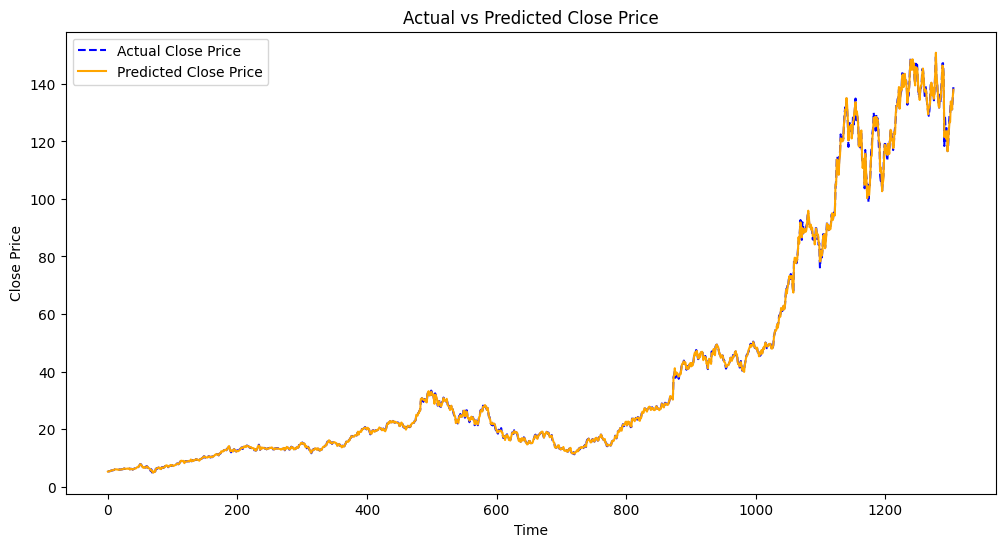

In [34]:
# Vizualize actual vs. Predicted Close Price
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Actual Close Price', color='blue', linestyle='dashed')
plt.plot(Y_pred_lr, label='Predicted Close Price', color='orange')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

###### ERROR DISTRUBUTION

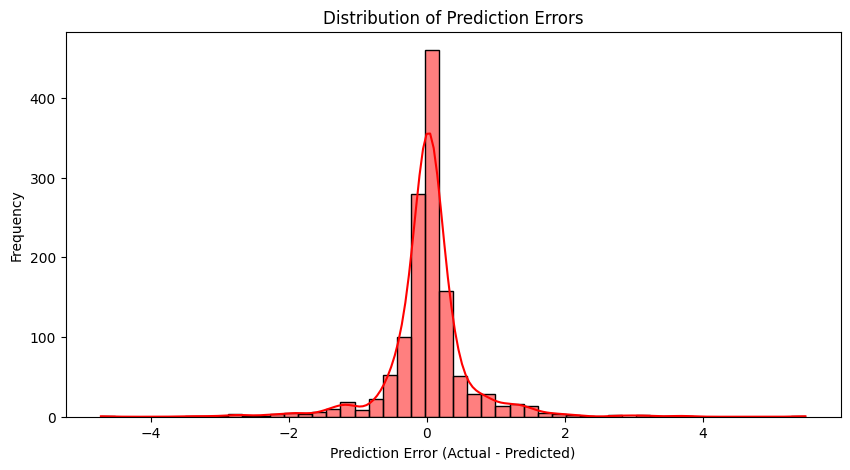

In [45]:
import seaborn as sns

errors = Y_test - Y_pred_lr
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True, color='red')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

###### Make Sure X is Defined¶
###### Before calling train_test_split, you need to ensure that X and Y are properly defined.

In [37]:
# Check available columns before selecting features
print(df.columns)  # Make sure column names match exactly

# Define X and Y correctly
X = df[['Open', 'High', 'Low', 'Volume', 'Price Range', 'Daily Return', 
        '7-Day Moving Avg', '30-Day Moving Avg']]  # Remove extra ''

Y = df['Target']

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

# Apply StandardScaler AFTER the split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler trained on X_train!

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Close_30Days_Mean', 'Price Range', 'Daily Return', 'Cumulative Return',
       '7-Day Moving Avg', '30-Day Moving Avg', 'Target'],
      dtype='object')


###### Checking Feature Importance in Linear Regression¶
###### Linear Regression, feature importance can be understood by looking at the absolute magnitude of the model coefficients.

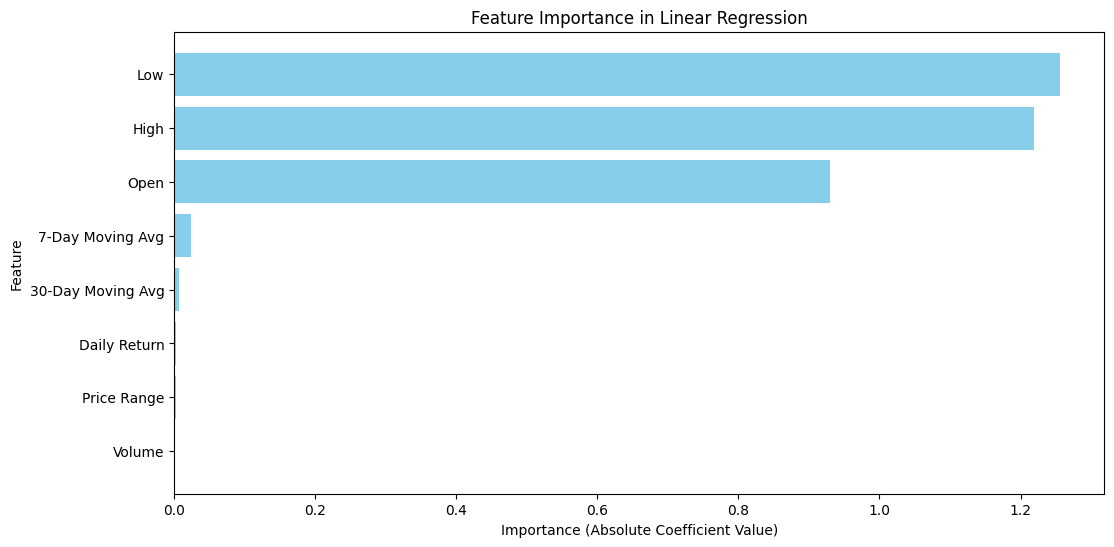

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance (absolute coefficient values)
feature_importance = np.abs(lr.coef_)
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()  # Flip order to show most important features on top
plt.show()